In [1]:
from konlpy.tag import Okt
from collections import Counter
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import matplotlib 
from IPython.display import set_matplotlib_formats
import numpy as np
from PIL import Image

In [2]:
# 토큰 str 불러오기
fr = open('../data/SinMoonGo_Token.txt', 'r', encoding='CP949')
lists = fr.readlines()
fr.close()

In [3]:
# 토큰별 태그와 함께 튜플 리스트로 저장
okt = Okt()
morphs = []

for sentence in lists:
    morphs.append(okt.pos(sentence))

In [5]:
# 토큰 튜플 리스트 확인
print(morphs)

[[('소통', 'Noun'), ('환경', 'Noun'), ('활용', 'Noun'), ('사회', 'Noun'), ('문제', 'Noun'), ('극복', 'Noun'), ('방안', 'Noun'), ('제안', 'Noun'), ('애완견', 'Noun'), ('목줄', 'Noun'), ('계', 'Noun'), ('홍보', 'Noun'), ('요원', 'Noun'), ('선발', 'Noun'), ('야외', 'Noun'), ('장애인', 'Noun'), ('전용', 'Noun'), ('주차', 'Noun'), ('구역', 'Noun'), ('피', 'Noun'), ('설치', 'Noun'), ('의무', 'Noun'), ('주택', 'Noun'), ('폭등', 'Noun'), ('사기꾼', 'Noun'), ('정부', 'Noun'), ('파면', 'Noun'), ('소하천', 'Noun'), ('변', 'Noun'), ('응급', 'Noun'), ('구급함', 'Noun'), ('비치', 'Noun'), ('여성가족부', 'Noun'), ('영문', 'Noun'), ('명칭', 'Noun'), ('수정', 'Noun'), ('요청', 'Noun'), ('학생', 'Noun'), ('실시', 'Noun'), ('인성', 'Noun'), ('교육', 'Noun'), ('시간', 'Noun'), ('공공시설', 'Noun'), ('비롯', 'Noun'), ('다중', 'Noun'), ('이용', 'Noun'), ('시설', 'Noun'), ('시간대', 'Noun'), ('출입', 'Noun'), ('인원', 'Noun'), ('제한', 'Noun'), ('시설', 'Noun'), ('이용', 'Noun'), ('약제', 'Noun'), ('도입', 'Noun'), ('디지털', 'Noun'), ('성범죄', 'Noun'), ('청소년', 'Noun'), ('무료', 'Noun'), ('심리검사', 'Noun'), ('및', 'Noun'), ('치료', 'No

In [12]:
# 부적절한 토큰 제외하고 리스트로 저장
noun_adj_list = []

for tuples in morphs:
    for word, tag in tuples:
        if tag in ['Noun'] and ("대한" not in word) and ("적용" not in word) and ("및" not in word) and ("요청" not in word) \
        and ("위" not in word) and ("관련" not in word) and ("수" not in word) and ("것" not in word) and ("저" not in word) \
        and ("입" not in word) and ("재" not in word) and ("등" not in word) and ("무" not in word) and ("제" not in word) \
        and ("시오" not in word) and ("이" not in word) and ("중" not in word) and ("더" not in word) and ("피" not in word) \
        and ("비" not in word) and ("자" not in word) and ("고" not in word) and ("대해" not in word) and ("를" not in word) \
        and ("왜" not in word) and ("요구" not in word) and ("의" not in word) and ("위" not in word) and ("을" not in word) \
        and ("청" not in word) and ("한" not in word) and ("자" not in word) and ("단" not in word) and ("제" not in word) \
        and ("제" not in word) and ("층" not in word) and ("개선" not in word):
            noun_adj_list.append(word)

In [13]:
# 최종 토큰 리스트 확인
print(noun_adj_list)

['소통', '환경', '활용', '사회', '극복', '방안', '애완견', '목줄', '계', '홍보', '요원', '선발', '야외', '장애인', '전용', '주차', '구역', '설치', '주택', '사기꾼', '정부', '파면', '소하천', '변', '응급', '구급함', '여성가족부', '영문', '명칭', '학생', '실시', '인성', '교육', '시간', '공공시설', '시설', '시간대', '인원', '시설', '디지털', '성범죄', '심리검사', '치료', '상담', '대안', '학교', '학력', '인정', '담배', '술', '판매', '휴대폰', '성인', '인증', '출산', '후', '개월', '동안', '원금', '지급', '발생', '시', '면허', '방안', '건', '외국인', '학생', '인', '개인', '예외', '조항', '추가', '종합', '보험', '신설', '원서', '세종시', '어울링', '휴대폰', '거치', '설치', '길', '해', '지방', '원서', '부동산', '해결', '해법', '사회', '정보화', '환경', '배려', '방안', '장기동', '병원', '부지', '사회', '노인', '장애인', '도서관', '오산시', '산후조리원', '지원', '딜레마', '존', '스쿨존', '관', '공동', '주택', '활성화', '사업', '확대', '업법', '인력', '명칭', '사용', '금지', '조치', '부동산', '대책', '시행', '령', '관내', '공장', '생산', '품질', '코로나', '통계', '처리', '생애', '최초', '취득세', '경마', '복권', '페지', '실', '거주', '목적', '주택', '생애', '주택', '신혼부부', '기존', '주택', '공급', '방안', '나라', '경마', '도립', '예술', '운영', '관', '서울시', '전기차', '폐', '배터리', '축전', '냉', '난방', '경기도', '감염증', '공식', '

In [14]:
# 토큰별 출연 횟수 dict 저장
count = Counter(noun_adj_list)
word_count = dict(count.most_common())

In [15]:
# 토큰별 출연 횟수 dict 확인
print(word_count)

{'코로나': 97, '방안': 57, '설치': 48, '주택': 42, '시': 41, '부동산': 41, '교육': 34, '정책': 33, '대책': 29, '안': 27, '학교': 25, '확대': 25, '마스크': 25, '활용': 23, '추가': 23, '시설': 22, '관': 22, '사업': 22, '관리': 22, '장애인': 21, '해결': 21, '사용': 21, '지원': 20, '도로': 20, '방법': 20, '안전': 20, '건': 19, '활성화': 19, '학생': 18, '변경': 18, '예방': 18, '공원': 18, '방역': 17, '보호': 17, '운영': 16, '국민': 16, '안정': 16, '사회': 15, '주차': 15, '표시': 15, '생활': 15, '건설': 15, '시행': 14, '내': 14, '시스템': 14, '기관': 14, '정부': 13, '방지': 13, '차량': 13, '용': 13, '환경': 12, '실시': 12, '공급': 12, '지역': 12, '아파트': 12, '법': 12, '처리': 11, '투기': 11, '집값': 11, '시대': 11, '카드': 11, '로': 11, '복지': 11, '개정': 11, '착용': 11, '구역': 10, '공동': 10, '주차장': 10, '온라인': 10, '선': 10, '조사': 10, '시험': 10, '앞': 10, '필요': 10, '행정': 10, '과': 10, '민원': 10, '조성': 10, '계획': 10, '긴급': 10, '기준': 10, '안내': 10, '발급': 10, '보완': 10, '외국인': 9, '길': 9, '해외': 9, '가격': 9, '버스': 9, '추진': 9, '문화': 9, '사항': 9, '홍보': 8, '인정': 8, '원금': 8, '국가': 8, '대학': 8, '시민': 8, '기능': 8, '포함': 8, '부동산대책': 8, '완화':

In [16]:
# 워드클라우드 배경 이미지 불러오기
kor_mask = np.array(Image.open('../data/Korean_United_flag.png'))

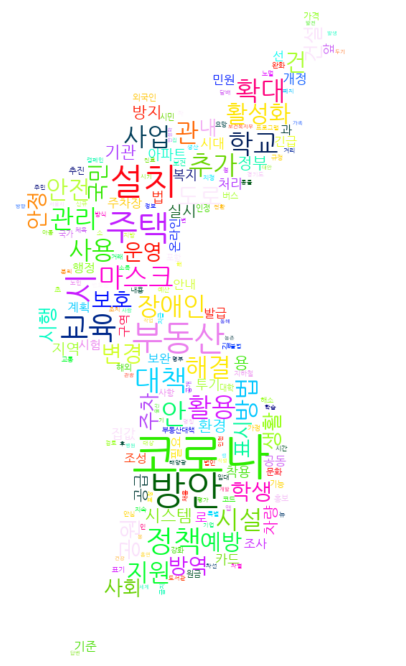

In [17]:
# 워드클라우드 생성 및 출력
wordcloud = WordCloud(background_color="white", font_path='../data/NanumGothic.ttf',
                     colormap='gist_ncar', width=800, height=800, mask=kor_mask)

wordcloud = wordcloud.generate_from_frequencies(word_count)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# 워드클라우드 png파일로 저장
wordcloud.to_file("../data/SinMoonGoWordCloud.png")